<a href="https://colab.research.google.com/github/Yoichi-hub/mao-seminar/blob/master/Covid_Osaka_Tokyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import time
import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt


url="https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_prefectures_daily_data.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
df["date"]=pd.to_datetime(df["日付"] )
df.set_index('date')
df=df[df.columns[[8,2,3,5]]]
df=df.rename(columns={'都道府県名':'kenName','各地の感染者数_1日ごとの発表数':'dayNumber','各地の死者数_1日ごとの発表数':'dayDeaths'})

In [2]:
df

,date,kenName,dayNumber,dayDeaths
0,2020-01-16,北海道,0,0
1,2020-01-17,北海道,0,0
2,2020-01-18,北海道,0,0
3,2020-01-19,北海道,0,0
4,2020-01-20,北海道,0,0
...,...,...,...,...
35057,2022-01-26,沖縄県,1256,0
35058,2022-01-27,沖縄県,1100,0
35059,2022-01-28,沖縄県,1073,0
35060,2022-01-29,沖縄県,979,0


In [ ]:
tokyo=df[df['kenName'].str.contains("東京")]

tokyo

,date,kenName,dayNumber,dayDeaths
8928,2020-01-16,東京都,0,0
8929,2020-01-17,東京都,0,0
8930,2020-01-18,東京都,0,0
8931,2020-01-19,東京都,0,0
8932,2020-01-20,東京都,0,0
...,...,...,...,...
9667,2022-01-24,東京都,8503,1
9668,2022-01-25,東京都,12813,0
9669,2022-01-26,東京都,14086,5
9670,2022-01-27,東京都,16538,3


In [ ]:
tokyo1=tokyo.shift(5)
tokyo1=tokyo1.rename(columns={'dayNumber':'dayDelayNumber','dayDeaths':'dayDelayDeaths'})
tokyo1['date']=tokyo1['date']+datetime.timedelta(days=5)
tokyo2=pd.merge(tokyo,tokyo1,on="date")
tokyo2["differ"]=tokyo2["dayNumber"]-tokyo2["dayDelayNumber"]
tokyo2

,date,kenName_x,dayNumber,dayDeaths,kenName_y,dayDelayNumber,dayDelayDeaths,differ
0,2020-01-21,東京都,0,0,東京都,0.0,0.0,0.0
1,2020-01-22,東京都,0,0,東京都,0.0,0.0,0.0
2,2020-01-23,東京都,0,0,東京都,0.0,0.0,0.0
3,2020-01-24,東京都,1,0,東京都,0.0,0.0,1.0
4,2020-01-25,東京都,1,0,東京都,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
734,2022-01-24,東京都,8503,1,東京都,7377.0,2.0,1126.0
735,2022-01-25,東京都,12813,0,東京都,8638.0,0.0,4175.0
736,2022-01-26,東京都,14086,5,東京都,9699.0,0.0,4387.0
737,2022-01-27,東京都,16538,3,東京都,11227.0,3.0,5311.0


In [ ]:

tokyo

,date,kenName,dayNumber,dayDeaths
8928,2020-01-16,東京都,0,0
8929,2020-01-17,東京都,0,0
8930,2020-01-18,東京都,0,0
8931,2020-01-19,東京都,0,0
8932,2020-01-20,東京都,0,0
...,...,...,...,...
9667,2022-01-24,東京都,8503,1
9668,2022-01-25,東京都,12813,0
9669,2022-01-26,東京都,14086,5
9670,2022-01-27,東京都,16538,3


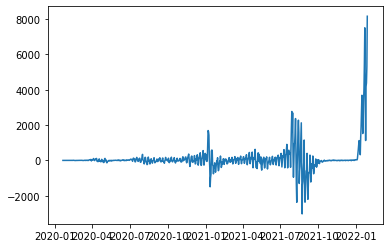

In [ ]:
x=tokyo2['date']
y=tokyo2['differ']

plt.plot(x,y)

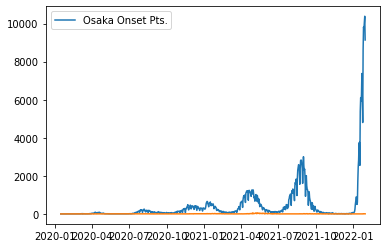

In [6]:
osaka=df[df['kenName'].str.contains("大阪")]

x=pd.to_datetime(osaka["date"])
y=osaka["dayNumber"]
z=osaka["dayDeaths"]

# プロット
plt.plot(x, y, label="Osaka Onset Pts.")

# 凡例の表示
plt.legend()


plt.plot(x, z, label="Osaka Death_Pts.")


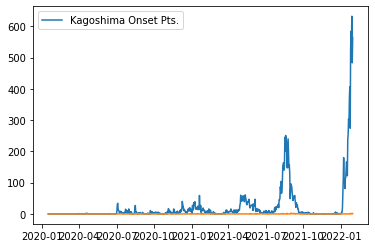

In [7]:
kago=df[df['kenName'].str.contains("鹿児島")]

x=pd.to_datetime(kago["date"])
y=kago["dayNumber"]
z=kago["dayDeaths"]

# プロット
plt.plot(x, y, label="Kagoshima Onset Pts.")

# 凡例の表示
plt.legend()


plt.plot(x, z, label="Kagoshima Death_Pts.")


plt.show()


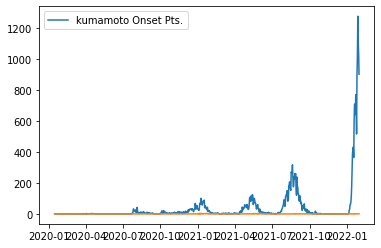

In [9]:
kuma=df[df['kenName'].str.contains("熊本")]

x=pd.to_datetime(kuma["date"])
y=kuma["dayNumber"]
z=kuma["dayDeaths"]

# プロット
plt.plot(x, y, label="kumamoto Onset Pts.")

# 凡例の表示
plt.legend()


plt.plot(x, z, label="kumamoto Death_Pts.")


plt.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27798 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27798 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32260 missing from current font.
  font.set_text(s, 0, flags=flags)


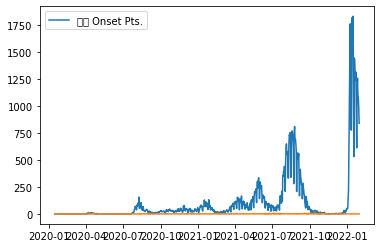

In [11]:
oki=df[df['kenName'].str.contains("沖縄")]

x=pd.to_datetime(oki["date"])
y=oki["dayNumber"]
z=oki["dayDeaths"]

# プロット
plt.plot(x, y, label="沖縄 Onset Pts.")

# 凡例の表示
plt.legend()


plt.plot(x, z, label="沖縄 Death_Pts.")


plt.show()


NameError: ignored